In [28]:
!pip install ipynb

In [120]:
import pandas as pd
ed = pd.read_csv("Estimation_accuracy.csv")
ed = ed.dropna(how='all').transpose().reset_index()
estimate_data = ed.rename({'index':'Model',0:'Datacenter',1:'Gamma',2:'PUE',3:'Processor',4:'TDP_WATTS',5:'chip_num',6:'training_time',7:'Energy(KWh)',8:'CO2(tonnes)'}, axis='columns')
estimate_data.drop(estimate_data.index[0], inplace=True)

In [119]:
estimate_data.head(10)

,Model,Datacenter,Gamma,PUE,Processor,TDP_WATTS,chip_num,training_time,Energy(KWh),CO2(tonnes)
1,Transformer (Big),Google Cloud,429,1.59,P100,300,8,84,316,0.1357
2,Evolved Transformer Medium,Google Cloud,478,1.11,P100,300,8,76.8,185,0.0883
3,Transformer (Big).1,Google Cloud,478,1.11,TPU v2,280,8,19.44,40,0.0189
4,Evolved Transformer Medium.1,Google Cloud,478,1.11,TPU v2,280,8,14.88,30,0.0143
5,Gshard-600B,Google Cloud,201,1.09,TPU v3,450,1024,74.4,24100,4.8
6,Switch-Transformer,Google Cloud,403,1.1,TPU v3,450,1024,648,179000,72.2
7,GPT-3,Microsoft Azure,429,1.1,V100,300,10000,355.2,1287000,552.1


In [124]:
estimate_data = estimate_data.astype({'Gamma':'float','PUE':'float','TDP_WATTS':'float','chip_num':'float','training_time':'float'})


In [140]:
def carbon_emissions(gamma,pue,tdp_watts,chip_num,training_time):
    energy = tdp_watts*chip_num*training_time
    energy = float(energy/1000)
    carbon_estimates = energy*gamma*pue
    return float(carbon_estimates/1000000)

In [141]:
estimate_data['CO2_Estimates'] = estimate_data.apply(lambda x: carbon_emissions((x['Gamma']), (x['PUE']),(x['TDP_WATTS']),(x['chip_num']),(x['training_time'])), axis=1)

In [142]:
estimate_data.head(10)

,Model,Datacenter,Gamma,PUE,Processor,TDP_WATTS,chip_num,training_time,Energy(KWh),CO2(tonnes),CO2_Estimates
1,Transformer (Big),Google Cloud,429.0,1.59,P100,300.0,8.0,84.00,316,0.1357,0.137513
2,Evolved Transformer Medium,Google Cloud,478.0,1.11,P100,300.0,8.0,76.80,185,0.0883,0.097797
3,Transformer (Big).1,Google Cloud,478.0,1.11,TPU v2,280.0,8.0,19.44,40,0.0189,0.023104
4,Evolved Transformer Medium.1,Google Cloud,478.0,1.11,TPU v2,280.0,8.0,14.88,30,0.0143,0.017685
5,Gshard-600B,Google Cloud,201.0,1.09,TPU v3,450.0,1024.0,74.40,24100,4.8,7.511176
6,Switch-Transformer,Google Cloud,403.0,1.10,TPU v3,450.0,1024.0,648.00,179000,72.2,132.368671
7,GPT-3,Microsoft Azure,429.0,1.10,V100,300.0,10000.0,355.20,1287000,552.1,502.856640


In [174]:
estimate_plot = estimate_data[["Model","CO2(tonnes)","CO2_Estimates"]].set_index(["Model"])
estimate_plot.head()

,CO2(tonnes),CO2_Estimates
Model,,
Transformer (Big),0.1357,0.137513
Evolved Transformer Medium,0.0883,0.097797
Transformer (Big).1,0.0189,0.023104
Evolved Transformer Medium.1,0.0143,0.017685
Gshard-600B,4.8,7.511176


Text(0, 0.5, 'Carbon dioxide emissions estimated (in tonnes)')

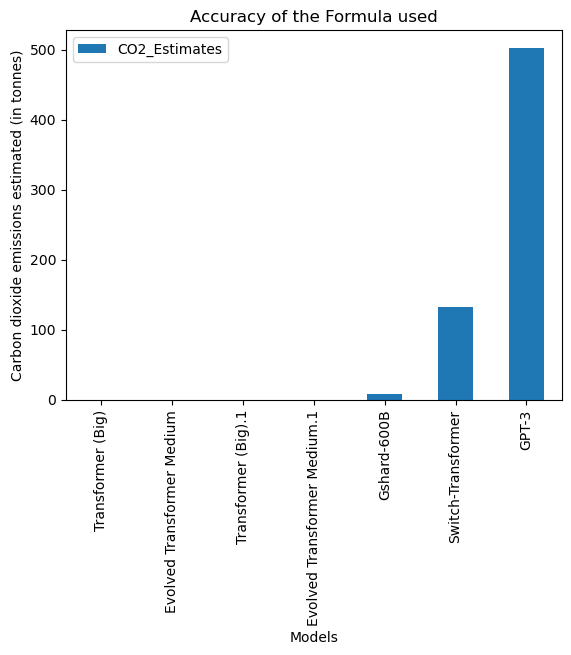

In [191]:
estimate_plot.plot(kind="bar")
plt.title("Accuracy of the Formula used")
plt.xlabel("Models")
plt.ylabel("Carbon dioxide emissions estimated (in tonnes)")